# Numerical computations
## Homework 5
## Ordinary Differential equations

Execute this section to install the needed libraries.

In [1]:
from sympy import *

In [2]:
x = symbols('x')
y = Function('y')(x)

### 1. Find general answer of these ODEs (use the given library) (10 points):

I. (5 points)
$$y^{(4)} - 3 y ^{(2)} + y - 1 = 0 $$


In [3]:
eq = y.diff(x, 4) - 3 * y.diff(x, 2) + y - 1
eq

y(x) - 3*Derivative(y(x), (x, 2)) + Derivative(y(x), (x, 4)) - 1

In [4]:
sol = dsolve(eq, hint='nth_linear_constant_coeff_undetermined_coefficients')
sol

Eq(y(x), C1*exp(x*(-1 + sqrt(5))/2) + C2*exp(x*(1 - sqrt(5))/2) + C3*exp(x*(1 + sqrt(5))/2) + C4*exp(x*(-sqrt(5) - 1)/2) + 1)

In [5]:
checkodesol(eq, sol)

(True, 0)

II. (5 points)
$$y^{(3)} + 2y^{(2)} + 3y^{(1)} + 4y + 5 = 0$$

In [6]:
eq = y.diff(x, 3) + 2 * y.diff(x, 2) + 3 * y.diff(x) + 4 * y + 5
eq

4*y(x) + 3*Derivative(y(x), x) + 2*Derivative(y(x), (x, 2)) + Derivative(y(x), (x, 3)) + 5

In [7]:
sol = dsolve(eq, hint='nth_linear_constant_coeff_undetermined_coefficients')
sol

Eq(y(x), C1*exp(x*(-4 - 5**(2/3)/(7 + 3*sqrt(6))**(1/3) + 5**(1/3)*(7 + 3*sqrt(6))**(1/3))/6)*sin(sqrt(3)*5**(1/3)*x*(5**(1/3)/(7 + 3*sqrt(6))**(1/3) + (7 + 3*sqrt(6))**(1/3))/6) + C2*exp(x*(-4 - 5**(2/3)/(7 + 3*sqrt(6))**(1/3) + 5**(1/3)*(7 + 3*sqrt(6))**(1/3))/6)*cos(sqrt(3)*5**(1/3)*x*(5**(1/3)/(7 + 3*sqrt(6))**(1/3) + (7 + 3*sqrt(6))**(1/3))/6) + C3*exp(x*(-5**(1/3)*(7 + 3*sqrt(6))**(1/3) - 2 + 5**(2/3)/(7 + 3*sqrt(6))**(1/3))/3) - 5/4)

In [8]:
checkodesol(eq, sol)

(True, 0)

In [ ]:
### 2. Solve the given first order non-linear ODE Using 4th order Runge-kutta method and then plot it (20 points)

For a sample equation:

$$y^{(1)} = \frac{ye^x}{1+e^x}$$
$$ interval = (1, 10) $$
$$ h = 0.01 $$
$$ y(1) = 1 $$

We have this input (in the same order):

```
y * exp(x) / (1 + exp(x))
1 10
0.01
1
```

Note that the equation might contain functions of x.


In [9]:
import numpy as np
from numpy import *
import matplotlib.pyplot as plt

In [10]:
def process_inputs(y_prime, interval, h, y0):
    f = eval(f'lambda x, y: {y_prime}')
    x0, xn = map(float, interval.split())
    x = np.arange(x0, xn, h).tolist() + [xn]
    y = [y0]
    return f, x, y

In [11]:
def plot(x, y, y_prime):
    plt.plot(x, y)
    plt.title(f'$y\' = {y_prime} \Rightarrow y({x[-1]:.2f}) = {y[-1]:.2f}$')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
    plt.close()

In [12]:
def solve_runge_kutta(y_prime, interval, h, y0):
    f, x, y = process_inputs(y_prime, interval, h, y0)
    for xi in x[:-1]:
        yi = y[-1]
        k1 = h * f(xi, yi)
        k2 = h * f(xi + h / 2, yi + k1 / 2)
        k3 = h * f(xi + h / 2, yi + k2 / 2)
        k4 = h * f(xi + h, yi + k3)
        y.append(yi + (k1 + 2 * (k2 + k3) + k4) / 6)
    plot(x, y, y_prime)
    return y[-1]

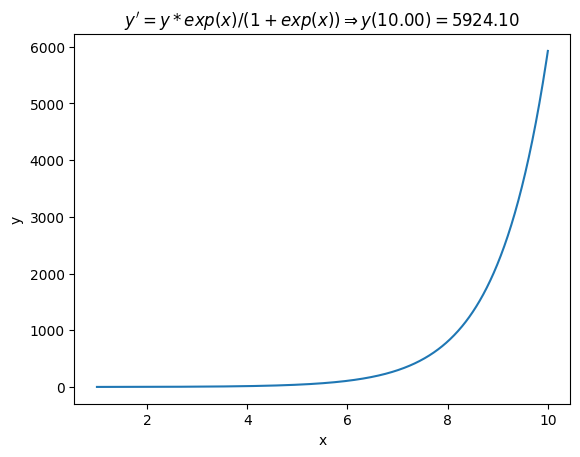

5924.097956213491

In [13]:
solve_runge_kutta(
    y_prime='y * exp(x) / (1 + exp(x))',
    interval='1 10',
    h=0.01,
    y0=1
)

In [ ]:
first_expr, second_expr, third_expr, fourth_expr = input(), input(), float(input()), float(input())
solve_runge_kutta(first_expr, second_expr, third_expr, fourth_expr)